# Python


Python is a computer programming language often used to build websites and software, automate tasks, and conduct data analysis.


# Google Collaborate


Google Colaboratory is a freemium tool offered by Google Research that allows users to write and execute Python code in their web browsers. 

# IMPORT PHASE 
Since we all know Matlab and it is impossible to use Control System Toolbox functions without downloading Control System Toolbox, we need to download some frameworks and libraries that are specialized in machine learning, statistics, and data manipulation in order to obtain our dataset and manipulate it, as we call "pre-processing," to make it ready for the machine learning models that we are using.
This is the part where we include the necessary libraries and frameworks such as TensorFlow, Keras, and Pandas. 


1.   TensorFlow\
The TensorFlow platform helps you implement best practices for data automation, model tracking, performance monitoring, and model retraining. The most useful advantage of TensorFlow is that it lets you use the GPU instead of the CPU, and GPUs are a lot faster than CPUs when it comes to dealing with machines. If we did not have TensorFlow, it would take plenty more time to deal with the training times of machine learning models.
2.  Keras\
Keras is a high-level, deep learning API developed by Google for implementing neural networks. It is written in Python and is used to make the implementation of neural networks easy.
3. Pandas\
Pandas is an open source Python package that is most widely used for data science, data analysis, and machine learning tasks. It is built on top of another package named Numpy, which provides support for multi-dimensional arrays.




In [31]:
from sklearn.preprocessing import PowerTransformer
!pip install requests
import requests as requests
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
from datetime import datetime,timedelta
import math
import math as mth
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
import tensorflow as tf
from scipy.stats import boxcox, shapiro
sns.set()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We need to let our code use the GPU of our machine to make it work faster with our model.

In [32]:
tf.config.experimental.list_physical_devices('GPU')

[]

**Importing the Dataset**

The date needs to be exported in the code. The Pandas library helps us read the dataset we have.


In [33]:
df = pd.read_csv('seattle-weather.csv')

The dataset has to be manipulated with respect to our needs for the machine learning model. 
\
In the dataset, we have the maximum and minimum temperature values for the represented day. But I want to forecast the average temperature. So I just added a new column to my dataset.

In [34]:
df_max = df['temp_max']
df_min = df['temp_min']
df['temp_average'] = (df_max + df_min)/2
df

,date,precipitation,temp_max,temp_min,wind,weather,temp_average
0,2012-01-01,0.0000,12.8000,5.0000,4.7000,drizzle,8.9000
1,2012-01-02,10.9000,10.6000,2.8000,4.5000,rain,6.7000
2,2012-01-03,0.8000,11.7000,7.2000,2.3000,rain,9.4500
3,2012-01-04,20.3000,12.2000,5.6000,4.7000,rain,8.9000
4,2012-01-05,1.3000,8.9000,2.8000,6.1000,rain,5.8500
...,...,...,...,...,...,...,...
1456,2015-12-27,8.6000,4.4000,1.7000,2.9000,rain,3.0500
1457,2015-12-28,1.5000,5.0000,1.7000,1.3000,rain,3.3500
1458,2015-12-29,0.0000,7.2000,0.6000,2.6000,fog,3.9000
1459,2015-12-30,0.0000,5.6000,-1.0000,3.4000,sun,2.3000


**Creating a New Dataframe for Prediction**

I want to compare my forecast results with my forecasts.\
I need to create a new dataframe that does not include the forecasted values I want; otherwise, my machine learning model would know about the values that I want to forecast, and it wouldn't be a forecast after all.

In [35]:
new_df = df.iloc[1:-58]
new_df


,date,precipitation,temp_max,temp_min,wind,weather,temp_average
1,2012-01-02,10.9000,10.6000,2.8000,4.5000,rain,6.7000
2,2012-01-03,0.8000,11.7000,7.2000,2.3000,rain,9.4500
3,2012-01-04,20.3000,12.2000,5.6000,4.7000,rain,8.9000
4,2012-01-05,1.3000,8.9000,2.8000,6.1000,rain,5.8500
5,2012-01-06,2.5000,4.4000,2.2000,2.2000,rain,3.3000
...,...,...,...,...,...,...,...
1398,2015-10-30,19.3000,17.2000,11.7000,6.7000,rain,14.4500
1399,2015-10-31,33.0000,15.6000,11.7000,7.2000,rain,13.6500
1400,2015-11-01,26.2000,12.2000,8.9000,6.0000,rain,10.5500
1401,2015-11-02,0.3000,11.1000,7.2000,2.8000,rain,9.1500


**Date Objects**

We want to create date objects to display our plots' x axis. Otherwise we would have indices.

In [36]:
d1 = datetime(2012,1,1,1,0,0,0)
numdays = len(new_df)
numdays_forecast = len(df)
dateList = []
dateList_forecast = []
for x in range (0, numdays):
    dateList.append(d1 + timedelta(days = x))
for x in range (0, numdays_forecast):
    dateList_forecast.append(d1 + timedelta(days = x))

**Checking the Dataframe**

We need tp be sure that our dataset does not have any missing cells. For that we are using .dropna command. If we have missing cells we have to fill them using some methods.

In [37]:
print('Number of rows and columns before removing missing values:', new_df.shape)
print('The time series starts from before removing missing values: ', new_df.date.min())
print('The time series ends on before removing missing values: ', new_df.date.max())

Number of rows and columns before removing missing values: (1402, 7)
The time series starts from before removing missing values:  2012-01-02
The time series ends on before removing missing values:  2015-11-03


In [38]:
new_df = new_df.dropna(subset=['temp_average'])
print('Number of rows and columns after removing missing values:', new_df.shape)
print('The time series starts from before removing missing values: ', new_df.date.min())
print('The time series ends on before removing missing values: ', new_df.date.max())

Number of rows and columns after removing missing values: (1402, 7)
The time series starts from before removing missing values:  2012-01-02
The time series ends on before removing missing values:  2015-11-03


  **Gaussian Distribution**


A distribution is simply a collection of the value and frequency of a given observation, like the age of a population.


Samples of an ideal Gaussian distribution (aka normal distribution or bell curve) follow the bell curve, meaning values are more likely to be around the mean than at the extremes. 


**Why is it Important in Machine Learning**

In machine learning, cost functions or neuron potential values are the quantities that are expected to be the sum of many independent processes (such as input features or activation potential of the last layer) and often have distributions that are nearly normal. Knowing the gaussian nature of the dataset, one can continue to use parametric statistics. 


Some ML models need to be converted into Gaussian distributions with some methods, such as power transforms, differential transforms, and so on.


But the model we will be using today is looking for hidden patterns and does not need the dataset to have a gaussian distribution.

In [39]:
stat, p = stats.normaltest(new_df.temp_average)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=71.874, p=0.000
Data does not look Gaussian (reject H0)


**Skewness**

Skewness is usually described as a measure of a dataset’s symmetry – or lack of symmetry.   A perfectly symmetrical data set will have a skewness of 0.   The normal distribution has a skewness of 0. 

**Kurtosis**  

Kurtosis describes the "fatness" of the tails found in probability distributions. The normal distribution has a kurtosis of exactly 3.0.

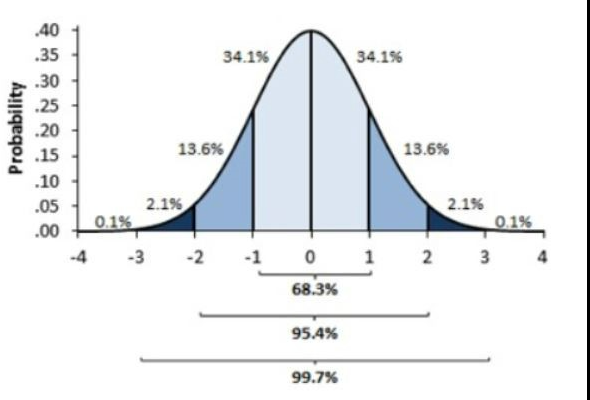

Kurtosis of normal distribution: -0.7000551623133595
Skewness of normal distribution: 0.0027819866989865125


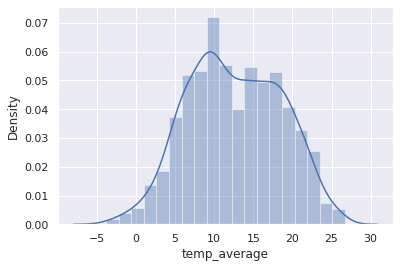

In [40]:
sns.distplot(new_df.temp_average)
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(new_df.temp_average)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(new_df.temp_average)))

**Probability Plot**

The probability plot is a graphical technique for assessing whether or not a data set follows a given distribution such as the normal or Weibull.
The data are plotted against a theoretical distribution in such a way that the points should form approximately a straight line. Departures from this straight line indicate departures from the specified distribution.

,count,mean,std,min,25%,50%,75%,max
precipitation,1461.0000,3.0294,6.6802,0.0000,0.0000,0.0000,2.8000,55.9000
temp_max,1461.0000,16.4391,7.3498,-1.6000,10.6000,15.6000,22.2000,35.6000
temp_min,1461.0000,8.2348,5.0230,-7.1000,4.4000,8.3000,12.2000,18.3000
wind,1461.0000,3.2411,1.4378,0.4000,2.2000,3.0000,4.0000,9.5000
temp_average,1461.0000,12.3369,5.9981,-3.8000,7.7500,11.9500,17.2000,26.7000


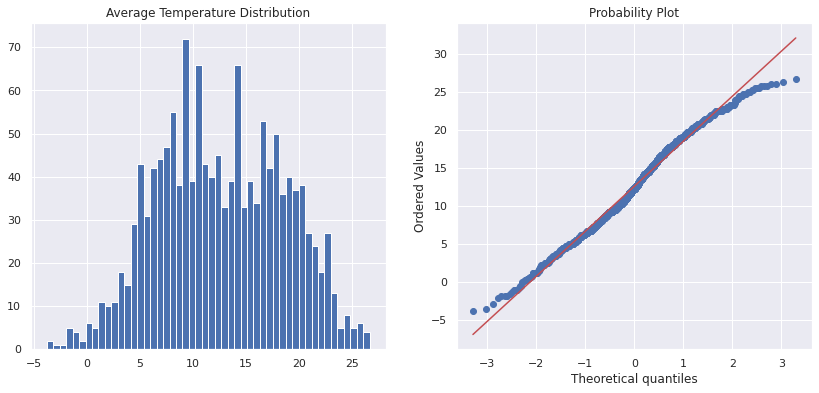

In [41]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
new_df['temp_average'].hist(bins=50)
plt.title('Average Temperature Distribution')

plt.subplot(1,2,2)
stats.probplot(new_df['temp_average'], plot=plt);
df.describe().T

**Time Series**

Before building the model, it is good to see the values that you need to deal with. We can see our model is seasonal, which means it is periodic over years.

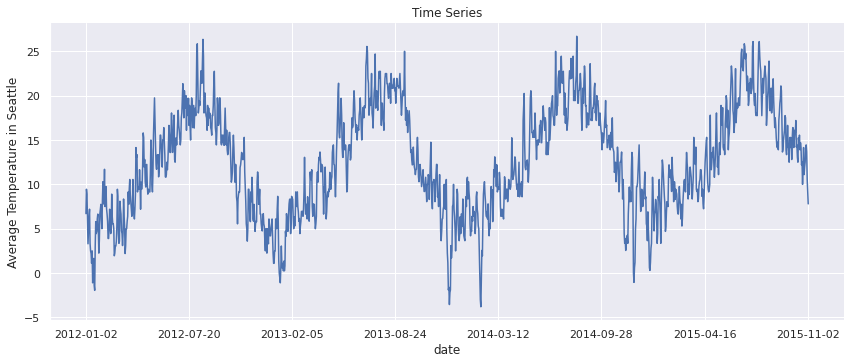

In [42]:
df1=new_df.loc[:,['date','temp_average']]
df1.set_index('date',inplace=True)
df1.plot(figsize=(12,5))
plt.ylabel('Average Temperature in Seattle')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Time Series')
sns.despine(top=True)
plt.show();

**Rolling Mean**

The rolling average or moving average is the simple mean of the last ‘n’ values. It can help us in finding trends that would be otherwise hard to detect. Also, they can be used to determine long-term trends. You can simply calculate the rolling average by summing up the previous ‘n’ values and dividing them by ‘n’ itself.

**Rolling Standard Deviation**

Standard deviation is a number that describes how spread out the values are. A low standard deviation means that most of the numbers are close to the mean (average) value. A high standard deviation means that the values are spread out over a wider range. Rolling standard deviation is used when we expect the standard deviation to change over time.

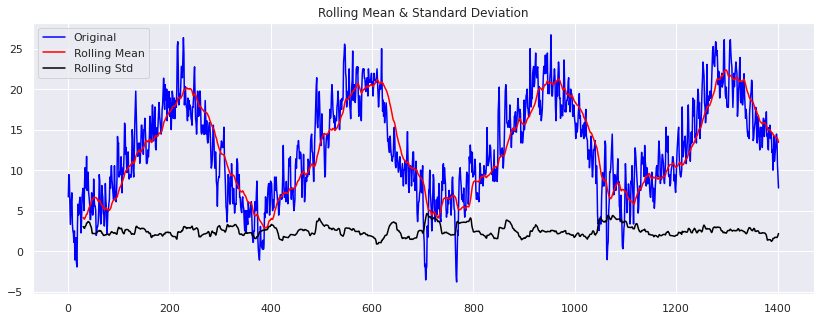

<Results of Dickey-Fuller Test>
Test Statistic                  -2.6492
p-value                          0.0832
#Lags Used                      13.0000
Number of Observations Used   1388.0000
Critical Value (1%)             -3.4351
Critical Value (5%)             -2.8636
Critical Value (10%)            -2.5679
dtype: float64


In [43]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(new_df.temp_average)    

**Correlation**

Correlation is used to find the relationship between two variables which is important in real life because we can predict the value of one variable with the help of other variables, who is being correlated with it. A positive correlation indicates two variables that tend to move in the same direction.
A negative correlation indicates two variables that tend to move in opposite directions. 

**Autocorrelation**

*   Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.
*   Autocorrelation measures the relationship between a variable's current value and its past values.
*   An autocorrelation of +1 represents a perfect positive correlation, while an autocorrelation of negative 1 represents a perfect negative correlation.
Technical analysts can use autocorrelation to measure how much influence past prices for a security have on its future price. Hence +1 is the perfect autocorrelation for time series predictions.







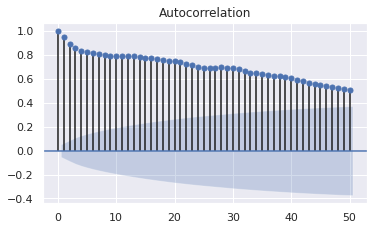

In [44]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
figsize=(10,5)
fig=sm.tsa.graphics.plot_acf(new_df.temp_average, lags=50)
fig.tight_layout(pad=3.0)
plt.show()

**Train and Test Dataset**

We have to train a model in order to make our model make predictions. If we don't train our model well enough for predictions, the result will come out bad.


In ML, a usually trained model is separated from 80% of the actual data. We want our model to find and learn the hidden parameters inside this model, implement what it learned onto the test dataset, and actually predict this test dataset.

**Scaling a Model**

The ML algorithm works better when features are relatively similar in scale and close to normal distribution.


Min-Max scaling is a normalization technique that enables us to scale data in a dataset to a specific range (0–1 in our case) using each feature’s minimum and maximum value. 


Unlike standard scaling, where data are scaled based on the standard normal distribution (with mean = 0 and standard deviation = 1), the min-max scaler uses each column’s minimum and maximum value to scale the data series.


The scale of data for some features may be significantly different from those of others, which may harm the performance of our models. It is especially the case with algorithms that rely on a measure of distance, such as neural networks and KNN.

In [45]:
dataset = new_df.temp_average.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("test data size: ", len(test))
print("train data size: ", len(train))
train

test data size:  281
train data size:  1121


array([[0.34426227],
       [0.4344262 ],
       [0.4163934 ],
       ...,
       [0.5426229 ],
       [0.52459013],
       [0.4885246 ]], dtype=float32)

**Time Steps**

Time steps are a way of examining and analyzing your data through specified time intervals. 


By setting the time steps, we define how many steps back our model should look for hidden patterns. We can forecast future steps in time.

In [46]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

We set the time step numbers and create our training and test dataset according to this time step.

In [47]:
look_back = 6
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)
print(X_train.shape)
print(X_test.shape)
#8

(1115, 6)
(275, 6)


We are reshaping our dataset to define the output numbers that we want.


Since we wanted only one output, we reshaped our model according to that.

In [48]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_train.shape

(1115, 1, 6)

**Hidden Layer (Neuron Numbers)**

Hidden Layers detect the neuron numbers that our models will use. There is a common formula to obtain hidden layers.

Hidden  Layers = Input Numbers ÷ (α * (Output Numbers + Time Steps))

Where α is an integer between 2 and 10



In [49]:
X_test.shape
realvalues = Y_test
hidden_layers = int(X_test.shape[0]/(7*(X_test.shape[1]+X_test.shape[2])))
#2
hidden_layers

5

**Recurrent Neural Networks**

Recurrent Neural Network(RNN) is a type of Neural Network where the output from the previous step are fed as input to the current step. In traditional neural networks, all the inputs and outputs are independent of each other, but in cases like when it is required to predict the next word of a sentence, the previous words are required and hence there is a need to remember the previous words. Thus RNN came into existence, which solved this issue with the help of a Hidden Layer. The main and most important feature of RNN is Hidden state, which remembers some information about a sequence.

RNN have a “memory” which remembers all information about what has been calculated. It uses the same parameters for each input as it performs the same task on all the inputs or hidden layers to produce the output. This reduces the complexity of parameters, unlike other neural networks.

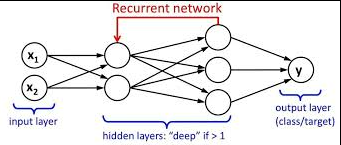

What is Unsupervised Learning?
Unsupervised Learning is a machine learning technique in which the users do not need to supervise the model. Instead, it allows the model to work on its own to discover patterns and information that was previously undetected. It mainly deals with the unlabelled data.

**LSTM Models**

An LSTM is a version of an RNN network. RNN takes the first input in a sequence and sends its output and the second input to the next step. This iteration continues to the end of the sequence.
 LSTM models use this structure with three gates. The gates are called the input gate, the forget gate, and the output gate. The first step in LSTM is determining which input must be rejected from the cell state. It can be done using the forget-gate layer function. Now the type of information stored in the cell state is settled. The forget-gate's recurrent activation function triggers the input-gate to define the new value. The selected activation function produces then a new candidate value vector C and it is added to the state. Finally, the output is obtained based on both the cell and a filtered version of it. The designated activation function is used to determine which part of the cell state goes to the output. At that time, the selected recurrent activation function is applied to the method. 

 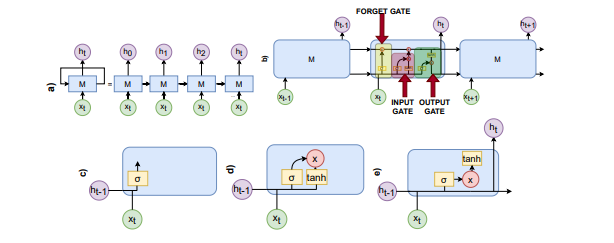

In [50]:


model = Sequential()
model.add((LSTM(hidden_layers, return_sequences=False , activation = 'relu',recurrent_activation='tanh',
                kernel_initializer='orthogonal',recurrent_initializer='orthogonal',input_shape=(X_test.shape[1],X_test.shape[2]))))
model.add(Dense(hidden_layers*2/3,activation='relu'))####*2/3 ve 5 dene
model.add(Dense(1))
model.compile(loss='mse', optimizer='Adam')

history = model.fit(X_train, Y_train, epochs=300, batch_size= 32,validation_data=(X_test, Y_test), 
                     callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)
# Training Phase

model.summary()

Epoch 1/300
35/35 [==============================] - 2s 12ms/step - loss: 0.2893 - val_loss: 0.3738
Epoch 2/300
35/35 [==============================] - 0s 4ms/step - loss: 0.2522 - val_loss: 0.3270
Epoch 3/300
35/35 [==============================] - 0s 4ms/step - loss: 0.2145 - val_loss: 0.2790
Epoch 4/300
35/35 [==============================] - 0s 3ms/step - loss: 0.1765 - val_loss: 0.2299
Epoch 5/300
35/35 [==============================] - 0s 4ms/step - loss: 0.1398 - val_loss: 0.1791
Epoch 6/300
35/35 [==============================] - 0s 5ms/step - loss: 0.0837 - val_loss: 0.0674
Epoch 7/300
35/35 [==============================] - 0s 6ms/step - loss: 0.0216 - val_loss: 0.0092
Epoch 8/300
35/35 [==============================] - 0s 7ms/step - loss: 0.0095 - val_loss: 0.0065
Epoch 9/300
35/35 [==============================] - 0s 4ms/step - loss: 0.0089 - val_loss: 0.0063
Epoch 10/300
35/35 [==============================] - 0s 5ms/step - loss: 0.0083 - val_loss: 0.0060
Epoch 11

**Mean Absolute Error**

Mean Absolute Error is a model evaluation metric used with machine learning models. The mean absolute error of a model with respect to a test set is the mean of the absolute values of the individual prediction errors on over all instances in the test set. Each prediction error is the difference between the true value and the predicted value for the instance.

**Root Mean Squared Error**

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

In [51]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
test_forecast = test_predict
# invert predictions

train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

9/9 [==============================] - 0s 4ms/step
Train Mean Absolute Error: 1.4874787407538796
Train Root Mean Squared Error: 1.8674387517751647
Test Mean Absolute Error: 1.469825403033332
Test Root Mean Squared Error: 1.863035483050058


We need to check the train loss and test loss in order to validate our model's performance. If test loss converges to 0 with time it means the model is performing good. But if it gets further from 0 it means something is going wrong with model's performance.

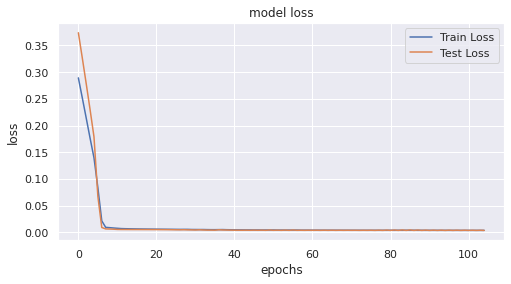

In [52]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

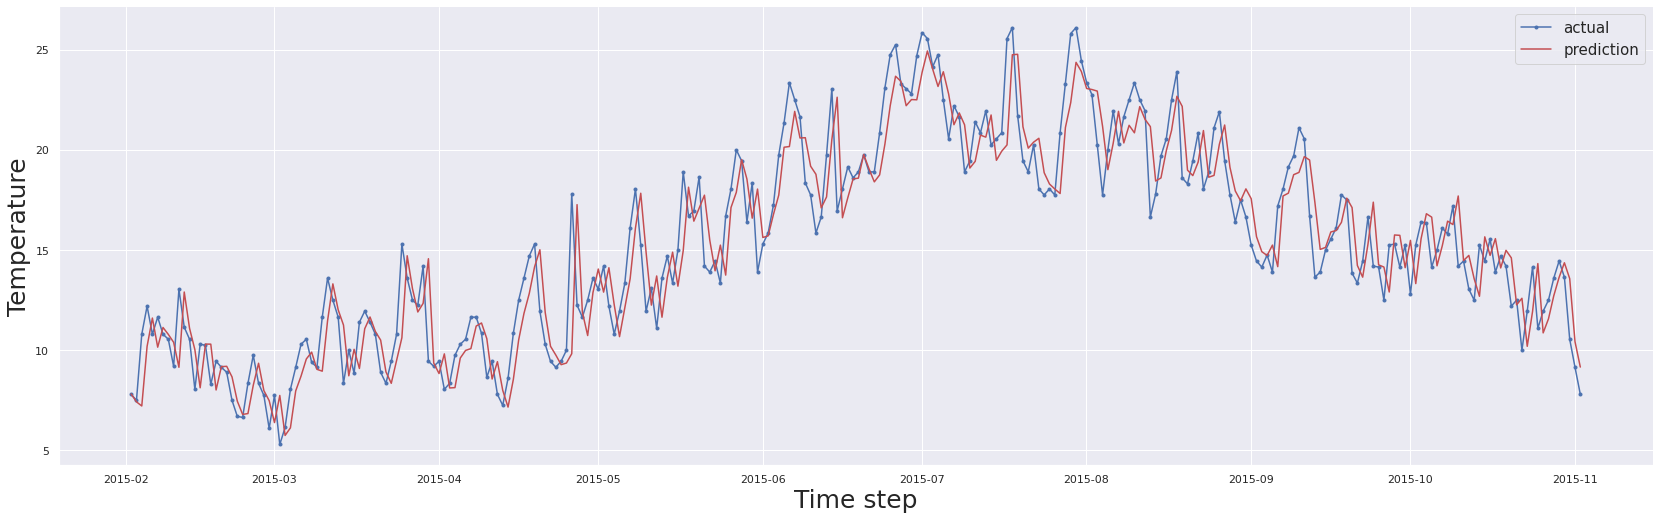

In [53]:
plt.figure(figsize=(24,7))
plt.plot(dateList[-(test_size-look_back-1):], Y_test[0][-(test_size-look_back-1):], marker='.', label="actual")
plt.plot(dateList[-(test_size-look_back-1):], test_predict[:,0][-(test_size-look_back-1):], 'r', label="prediction")
plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Temperature', size=25)
plt.xlabel('Time step', size=25)
plt.legend(fontsize=15)
plt.show();

# Forecast 

Until now, we predicted earlier temperature values, and our model was able to correct itself with the occurrence of the actual values. It can be called a part of optimizing the model for future forecasting.


We seperated our dataset in the first place. So now we will try to forecast those values without feeding our model with those values. So basically, we are just forecasting future values, but I separated the time series so that we won't have to wait for future values to occur.

Here we create a dataset that includes the data from the last element of the dataset to the time step.


In [54]:
x_input = dataset[-look_back:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

scaler.inverse_transform(x_input)

array([[13.6     , 14.450001, 13.65    , 10.55    ,  9.15    ,  7.8     ]],
      dtype=float32)

**Forecast**

Here, we are making the forecast possible. We just predict the next value and append this forecasted value to our dataset. Let's say our dataset has 1000 elements in it. We predict the 1001st element. Then we append this 1001st vvalue to the dataset and predict the 1002nd element using the new 1001st element dataset.

In [55]:
lst_output=[]
n_steps=look_back
i=0

while(i<look_back - 1):

    if(len(temp_input)>look_back):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        print(scaler.inverse_transform(x_input))
        x_input = x_input.reshape((1, 1, n_steps))
        
        yhat = model.predict(x_input, verbose=1)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        print(scaler.inverse_transform(yhat))
        lst_output.extend(yhat.tolist())
        
        i=i+1
    else:
        x_input = x_input.reshape((1, 1, n_steps))
        yhat = model.predict(x_input, verbose=1)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        print(scaler.inverse_transform(lst_output))
        i=i+1 

1/1 [==============================] - 0s 23ms/step
[[8.073014]]
[[14.45000103 13.6499994  10.55000056  9.14999997  7.80000005  8.073014  ]]
1/1 [==============================] - 0s 22ms/step
[[8.141677]]
[[13.6499994  10.55000056  9.14999997  7.80000005  8.073014    8.14167675]]
1/1 [==============================] - 0s 22ms/step
[[8.149982]]
[[10.55000056  9.14999997  7.80000005  8.073014    8.14167675  8.14998292]]
1/1 [==============================] - 0s 22ms/step
[[8.011469]]
[[9.14999997 7.80000005 8.073014   8.14167675 8.14998292 8.01146849]]
1/1 [==============================] - 0s 22ms/step
[[7.8645754]]


Here we just apply the inverse transform to get the effect of minmax scale back to normal values.

In [56]:

lst_output = scaler.inverse_transform(lst_output)
last_pred = (test_predict[-1])
lst_output = lst_output.tolist()
lst_output.insert(0,last_pred) 
lst_output

[array([9.162034], dtype=float32),
 [8.073013995197453],
 [8.141676746775028],
 [8.149982922709524],
 [8.0114684856386],
 [7.864575154962492]]

In [57]:
startDate=dateList[-1]
endDate=startDate-timedelta(days=(-look_back + 1))
startDate=startDate-timedelta(days=0)
index_48=(pd.date_range(start=datetime.strftime(startDate, "%Y-%m-%d %H:%M:%S"),end=datetime.strftime(endDate, "%Y-%m-%d %H:%M:%S"),freq='1d'))

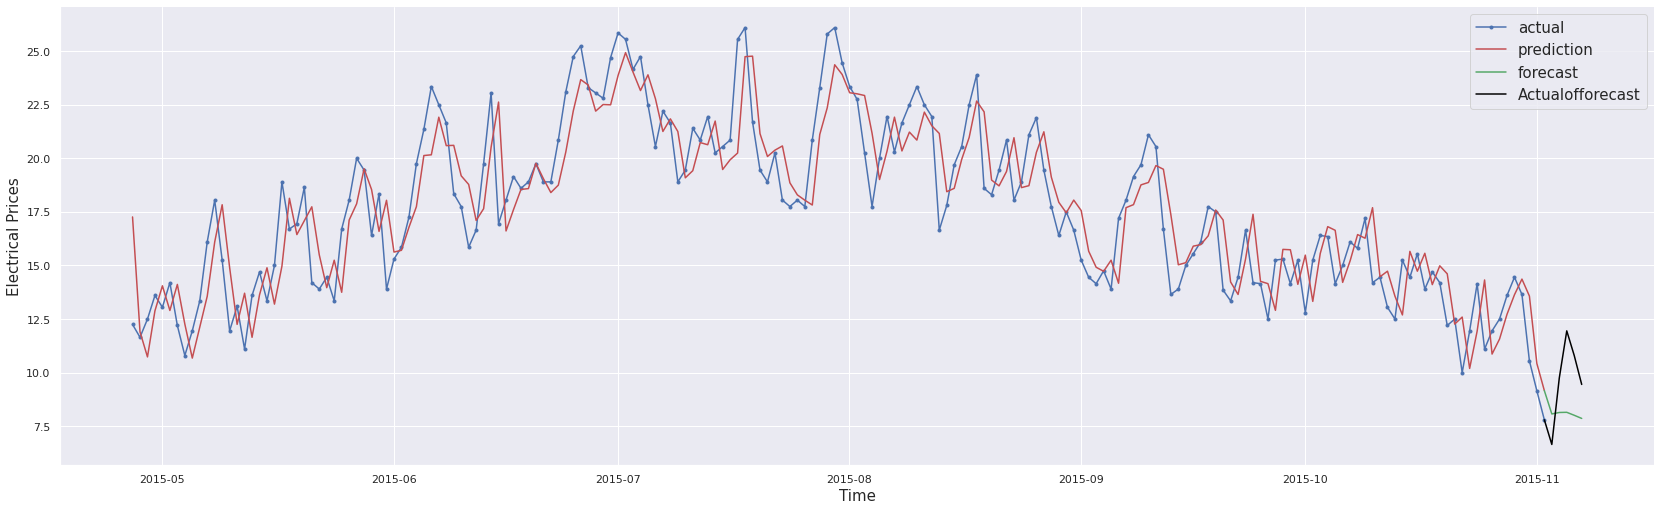

In [58]:
plt.figure(figsize=(24,7))
plt.plot(dateList[-190:], Y_test[0][-190:], marker='.',label="actual")
plt.plot(dateList[-190:], test_predict[:,0][-190:], 'r' , label="prediction")
plt.plot(index_48,lst_output,'g', label="forecast")
plt.plot(index_48, df['temp_average'][-(len(dateList_forecast) - len(dateList)): -(len(dateList_forecast) - len(dateList)) + len(index_48)] , 'black', label="Actualofforecast")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Electrical Prices', size=15)
plt.xlabel('Time', size=15)
plt.legend(fontsize=15)
plt.show();                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [59]:
multiplier = 1.25
lst_output_mult = np.array(lst_output) 
for i in range(0,len(lst_output_mult)-2):
  if (lst_output_mult[i+2][0] > lst_output_mult[i][0]) and (lst_output_mult[i+2][0] > lst_output_mult[i+1][0]) :
      lst_output_mult[i+2] = lst_output_mult[i+2] * multiplier
  if (lst_output_mult[i+2][0] < lst_output_mult[i][0]) and (lst_output_mult[i+2][0] < lst_output_mult[i+1][0]):
      lst_output_mult[i+2] = lst_output_mult[i+2] /  multiplier     
lst_output_mult

array([[ 9.16203403],
       [ 8.073014  ],
       [ 8.14167675],
       [10.18747865],
       [ 6.40917479],
       [ 7.86457515]])

Finding the correct trend is the most important part in forecasting. We can find the magnitude with some easy math operations.

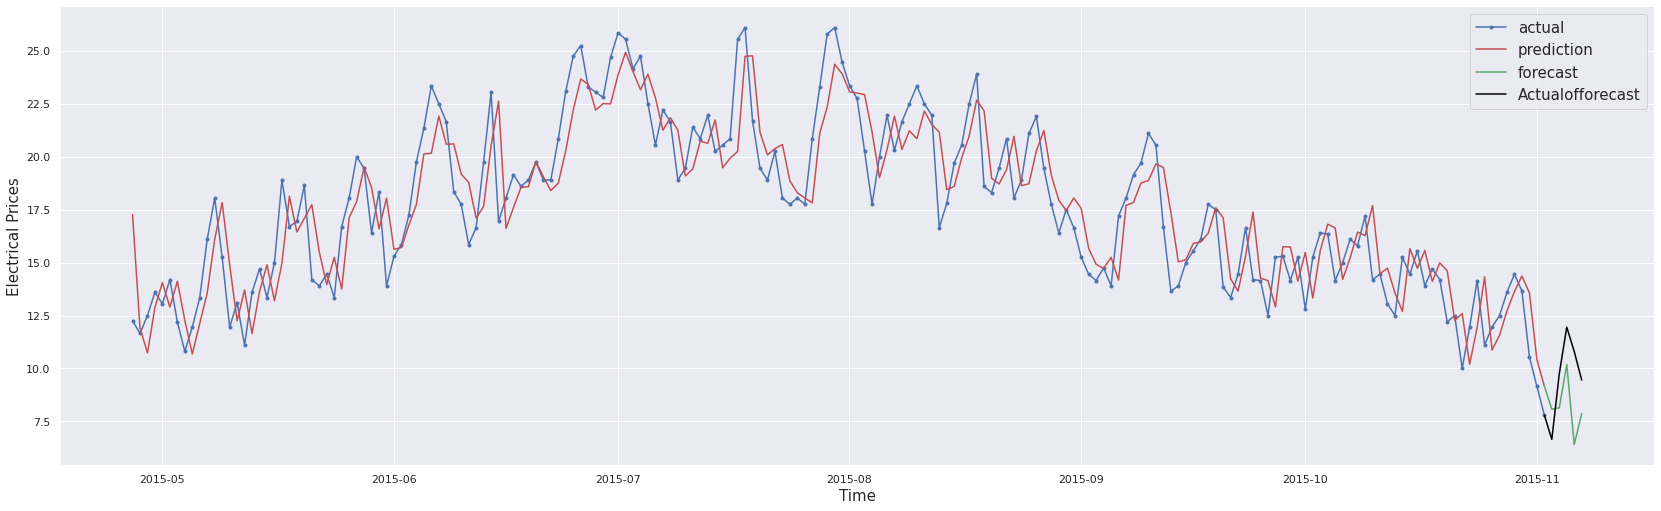

In [60]:
plt.figure(figsize=(24,7))
plt.plot(dateList[-190:], Y_test[0][-190:], marker='.',label="actual")
plt.plot(dateList[-190:], test_predict[:,0][-190:], 'r' , label="prediction")
plt.plot(index_48,lst_output_mult,'g', label="forecast")
plt.plot(index_48, df['temp_average'][-(len(dateList_forecast) - len(dateList)): -(len(dateList_forecast) - len(dateList)) + len(index_48)] , 'black', label="Actualofforecast")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Electrical Prices', size=15)
plt.xlabel('Time', size=15)
plt.legend(fontsize=15)
plt.show();      